# **Assessing the Results of Road Defect Detection Model**
Small adaptations made to original tutorial by Sekilabs (https://github.com/sekilab/RoadDamageDetector/blob/master/RoadDamageDatasetTutorial.ipynb)

**Data**
- Collected and annotated (PASCAL VOC format) by Maeda et al. 
- Comprised of 9,053 road damage images captured with a smartphone installed on a car, with 15,435 instances of road surface damage included in these road images
- RoadCrackDataset across 7 municipalities in Japan
    - Adachi
        - JPEGImages : contains images
        - Annotations : contains xml files of annotation
        - ImageSets : contains text files that show training or evaluation 
    - Chiba
    - Muroran
    - Ichihara
    - Sumida
    - Nagakute
    - Numazu

Maeda, H., Sekimoto, Y., Seto, T., Kashiyama, T., & Omata, H. Road Damage Detection and Classification Using Deep Neural Networks with Smartphone Images. Computer‐Aided Civil and Infrastructure Engineering. 
[Read Paper](https://arxiv.org/pdf/1801.09454.pdf)

**Model**

Links to the frozen model provided by the Maeda et al. were found to be broken. Hence a new model was trained on SSD MobileNet (see see Training a Road Defect Detector_v0.1.ipynb)

- Uploaded trained models and label map file to Google Drive

**Read Data**

Data was uploaded to google drive, and notebook evaluation was run on google colab

In [1]:
# mount to drive
# will be prompted for authorisation code
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import six.moves.urllib as urllib
import os

In [3]:
# downloaded dataset and uploaded to google drive
# need to mount drive
cd /content/drive/My Drive/RoadDamageDataset/

/content/drive/My Drive/RoadDamageDataset


In [4]:
try:
    import urllib.request
except ImportError:
    raise ImportError('You should use Python 3.x')

if not os.path.exists('./RoadDamageDataset.tar.gz'):
  # this url doesn't work
    url_base = 'https://s3-ap-northeast-1.amazonaws.com/mycityreport/RoadDamageDataset.tar.gz'
    urllib.request.urlretrieve(url_base, './RoadDamageDataset.tar.gz')
    
    print("Download RoadDamageDataset.tar.gz Done")
    
else:
    print("You have RoadDamageDataset.tar.gz")

You have RoadDamageDataset.tar.gz


In [5]:
# this procces may take a few minutes
!tar -zxf ./RoadDamageDataset.tar.gz

tar: RoadDamageDataset/Numazu/JPEGImages/._Numazu_20170906133631.jpg: Cannot open: Input/output error
^C


**Data Exploration**

Understanding the distribution of each type of road defects across mulicipalities

In [6]:
from xml.etree import ElementTree
from xml.dom import minidom
import collections

import os

import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
base_path = os.getcwd() + '/RoadDamageDataset/'

damageTypes=["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44"]

# govs corresponds to municipality name.
govs = ["Adachi", "Chiba", "Ichihara", "Muroran", "Nagakute", "Numazu", "Sumida"]


In [8]:
# the number of total images and total labels.
cls_names = []
total_images = 0
for gov in govs:
    
    file_list = [filename for filename in os.listdir(base_path + gov + '/Annotations/') if not filename.startswith('.')]

    for file in file_list:

        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open(base_path + gov + '/Annotations/' +file)
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
print("total")
print("# of images：" + str(total_images))
print("# of labels：" + str(len(cls_names)))

total
# of images：9053
# of labels：15457


D00 : 2768
D01 : 3789
D10 : 742
D11 : 636
D20 : 2541
D40 : 409
D43 : 817
D44 : 3733


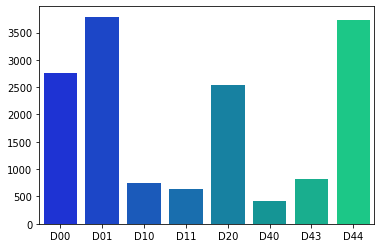

In [9]:
# the number of each class labels.
import collections
count_dict = collections.Counter(cls_names)
cls_count = []
for damageType in damageTypes:
    print(str(damageType) + ' : ' + str(count_dict[damageType]))
    cls_count.append(count_dict[damageType])
    
sns.set_palette("winter", 8)
sns.barplot(damageTypes, cls_count)

In [10]:
# the number of each class labels for each municipality
for gov in govs:
    cls_names = []
    total_images = 0
    file_list = [filename for filename in os.listdir(base_path + gov + '/Annotations/') if not filename.startswith('.')]

    for file in file_list:

        total_images = total_images + 1
        if file =='.DS_Store':
            pass
        else:
            infile_xml = open(base_path + gov + '/Annotations/' +file)
            tree = ElementTree.parse(infile_xml)
            root = tree.getroot()
            for obj in root.iter('object'):
                cls_name = obj.find('name').text
                cls_names.append(cls_name)
    print(gov)
    print("# of images：" + str(total_images))
    print("# of labels：" + str(len(cls_names)))
    
    count_dict = collections.Counter(cls_names)
    cls_count = []
    for damageType in damageTypes:
        print(str(damageType) + ' : ' + str(count_dict[damageType]))
        cls_count.append(count_dict[damageType])
        
    print('**************************************************')

Adachi
# of images：1650
# of labels：2924
D00 : 529
D01 : 1013
D10 : 153
D11 : 279
D20 : 172
D40 : 11
D43 : 191
D44 : 567
**************************************************
Chiba
# of images：467
# of labels：797
D00 : 183
D01 : 187
D10 : 13
D11 : 12
D20 : 27
D40 : 3
D43 : 104
D44 : 267
**************************************************
Ichihara
# of images：254
# of labels：482
D00 : 175
D01 : 71
D10 : 18
D11 : 9
D20 : 43
D40 : 8
D43 : 20
D44 : 138
**************************************************
Muroran
# of images：2145
# of labels：3601
D00 : 671
D01 : 574
D10 : 124
D11 : 88
D20 : 1192
D40 : 189
D43 : 50
D44 : 712
**************************************************
Nagakute
# of images：1366
# of labels：2302
D00 : 482
D01 : 477
D10 : 169
D11 : 58
D20 : 351
D40 : 14
D43 : 90
D44 : 659
**************************************************
Numazu
# of images：2032
# of labels：3711
D00 : 560
D01 : 807
D10 : 245
D11 : 129
D20 : 735
D40 : 165
D43 : 161
D44 : 908
************************************

# Check some images in this dataset

In [0]:
import cv2
import random

In [0]:
def draw_images(image_file):
    gov = image_file.split('_')[0]
    img = cv2.imread(base_path + gov + '/JPEGImages/' + image_file.split('.')[0] + '.jpg')
    
    infile_xml = open(base_path + gov + '/Annotations/' +image_file)
    tree = ElementTree.parse(infile_xml)
    root = tree.getroot()
    
    for obj in root.iter('object'):
        cls_name = obj.find('name').text
        xmlbox = obj.find('bndbox')
        xmin = int(xmlbox.find('xmin').text)
        xmax = int(xmlbox.find('xmax').text)
        ymin = int(xmlbox.find('ymin').text)
        ymax = int(xmlbox.find('ymax').text)

        font = cv2.FONT_HERSHEY_SIMPLEX

        # put text
        cv2.putText(img,cls_name,(xmin,ymin-10),font,1,(0,255,0),2,cv2.LINE_AA)

        # draw bounding box
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0,255,0),3)
    return img

error: ignored

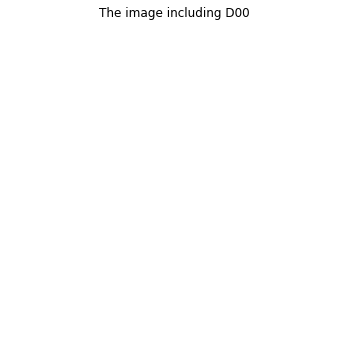

In [13]:
for damageType in damageTypes:
    tmp = []
    for gov in govs:
        file = open(base_path + gov + '/ImageSets/Main/%s_trainval.txt' %damageType, 'r')

        for line in file:
            line = line.rstrip('\n').split('/')[-1]

            if line.split(' ')[2] == '1':
                tmp.append(line.split(' ')[0]+'.xml')
        
        
    random.shuffle(tmp)
    fig = plt.figure(figsize=(6,6))
    for number, image in enumerate(tmp[0:1]):
        img = draw_images(image)
        #plt.subplot(1,1,number)
        plt.axis('off')
        plt.title('The image including ' + damageType)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


**Results**

Evaluating the results of the model on unseen municipalities data

In [0]:
import numpy as np
import sys
import tarfile
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

#we need tenorflow v 1.15.0, object detection API is removed from tf v 2.0+
%tensorflow_version 1.x
import tensorflow.compat.v1 as tf
print(tf.__version__)


In [0]:
# Download Tensorflow
%cd /content/drive/My Drive/RoadDamageDataset
!git clone --q https://github.com/tensorflow/models.git

In [0]:
%cd /content/drive/My Drive/RoadDamageDataset/models/research
#compiling the proto buffers (not important to understand for this project but you can learn more about them here: https://developers.google.com/protocol-buffers/)
!protoc object_detection/protos/*.proto --python_out=.

# exports the PYTHONPATH environment variable with the reasearch and slim folders' paths
os.environ['PYTHONPATH'] += ':/content/road_defect_detection/models/research/:/content/road_defect_detection/models/research/slim/'
sys.path.append('/content/drive/My Drive/object_detection/')

In [0]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

**Loading the Model**

## Variables

Any model exported using the `export_inference_graph.py` tool can be loaded here simply by changing `PATH_TO_CKPT` to point to a new .pb file.  

By default we use an "SSD with Mobilenet" model here. See the [detection model zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.

In [0]:
%cd /content/drive/My Drive/RoadDamageDataset/
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT =  'trainedModels/ssd_mobilenet_RoadDamageDetector_Custom Road Defect Detector.pb' 

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = 'trainedModels/crack_label_map.pbtxt'

NUM_CLASSES = 6

**Load a (frozen) Tensorflow model into memory.**

In [0]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

**Load label map**

Label maps map indices to category names

In [0]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [0]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

**Road Defect Detection**

- Randomly sample test set for evaluation
- Visually inspect and validate results

In [0]:
# get images from val.txt
PATH_TO_TEST_IMAGES_DIR = '/content/drive/My Drive/RoadDamageDataset/RoadDamageDataset/'
D_TYPE = ['D00', 'D01', 'D10', 'D11', 'D20','D40', 'D43']
govs = ['Adachi', 'Ichihara', 'Muroran', 'Chiba', 'Sumida', 'Nagakute', 'Numazu']

val_list = []
for gov in govs:
    file = open(PATH_TO_TEST_IMAGES_DIR + gov + '/ImageSets/Main/val.txt', 'r')
    for line in file:
        line = line.rstrip('\n').split('/')[-1]
        val_list.append(line)
    file.close()

print("# of validation images：" + str(len(val_list)))

In [0]:
TEST_IMAGE_PATHS=[]
random.shuffle(val_list)

for val_image in val_list[0:5]:
    TEST_IMAGE_PATHS.append(PATH_TO_TEST_IMAGES_DIR + val_image.split('_')[0]+ '/JPEGImages/%s.jpg' %val_image)
# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

In [0]:
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      # Actual detection.
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          min_score_thresh=0.3,
          use_normalized_coordinates=True,
          line_thickness=8)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)


In [0]:
#!rm -rf ./RoadDamageDataset.tar.gz
#!rm -rf ./RoadDamageDataset
#!rm -rf ./trainedModels.tar.gz
#!rm -rf ./trainedModels